In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_excel('fema_floods.xlsx')
#https://www.geeksforgeeks.org/replacing-missing-values-using-pandas-in-python/
df.fillna(df.median(numeric_only=True), inplace=True)
df.fillna(df.mode().iloc[0], inplace=True)

df['shark_presence'] = df['Species'].apply(lambda x: 1 if x == 'BSH' else 0)  #a shark is there if the catchtypecode applies, otherwise not a shark
categorical_colums = ['Area', 'FishZoneCode', 'GearGrp', 'CatchSource']
numeric_colums = ['Qty_t', 'CnvFactor']

le = LabelEncoder()
for colum in categorical_colums:
    df[colum] = le.fit_transform(df[colum])

X = df[categorical_colums + numeric_colums]
y = df['shark_presence']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#DECISION TREE https://www.w3schools.com/python/python_ml_decision_tree.asp and https://www.datacamp.com/tutorial/decision-tree-classification-python
for depth in range(1, 11):
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    clf.fit(X_train, y_train)
    test_pred = clf.predict(X_test)

    test_accuracy = np.mean(test_pred == y_test)
    print(f"Max Depth: {depth} | Test Accuracy: {test_accuracy:.2f}") #https://stackoverflow.com/questions/58171983/need-help-understanding-the-format-2f-command-and-why-it-is-not-working-in-my

# Output sample predictions
print("Sample predictions:")
print(X_test.iloc[:5])
print(test_pred[:5])

df['CnvFactor'] = pd.to_numeric(df['CnvFactor'], errors='coerce')
df['Qty_t'] = pd.to_numeric(df['Qty_t'], errors='coerce')
df.dropna(subset=['Species', 'Qty_t', 'Area'], inplace=True)

X = df[['CnvFactor', 'Qty_t']]
y = df['Area']

species = 'BSH'
y = (df['CatchTypeCode'] == species).astype(int)


print("\nFeature Matrix (X):")
print(X.describe())
print("\nTarget Summary (y):")
print(y.value_counts())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)

y_pred = dtc.predict(X_test)


Max Depth: 1 | Test Accuracy: 0.97
Max Depth: 2 | Test Accuracy: 0.97
Max Depth: 3 | Test Accuracy: 0.97
Max Depth: 4 | Test Accuracy: 0.97
Max Depth: 5 | Test Accuracy: 0.97
Max Depth: 6 | Test Accuracy: 0.97
Max Depth: 7 | Test Accuracy: 0.97
Max Depth: 8 | Test Accuracy: 0.97
Max Depth: 9 | Test Accuracy: 0.97
Max Depth: 10 | Test Accuracy: 0.97
Sample predictions:
       Area  FishZoneCode  GearGrp  CatchSource    Qty_t  CnvFactor
79750     6             0        0            1  175.157        1.0
61622    16             0        6            1   48.795        1.0
127      14             1       12            1  228.000        1.0
82457    16             0        6            1    0.000        1.8
26735    24             3        6            1   32.048        1.0
[0 0 0 0 0]



Feature Matrix (X):
          CnvFactor         Qty_t
count  96295.000000  96295.000000
mean       1.489842    416.051549
std        6.972094   1995.962620
min        1.000000      0.000000
25%        1.000000      0.170000
50%        1.000000      7.437000
75%        1.000000    111.695760
max      108.000000  74001.000000

Target Summary (y):
CatchTypeCode
0    96295
Name: count, dtype: int64

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19259

    accuracy                           1.00     19259
   macro avg       1.00      1.00      1.00     19259
weighted avg       1.00      1.00      1.00     19259


Confusion Matrix
[[19259]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


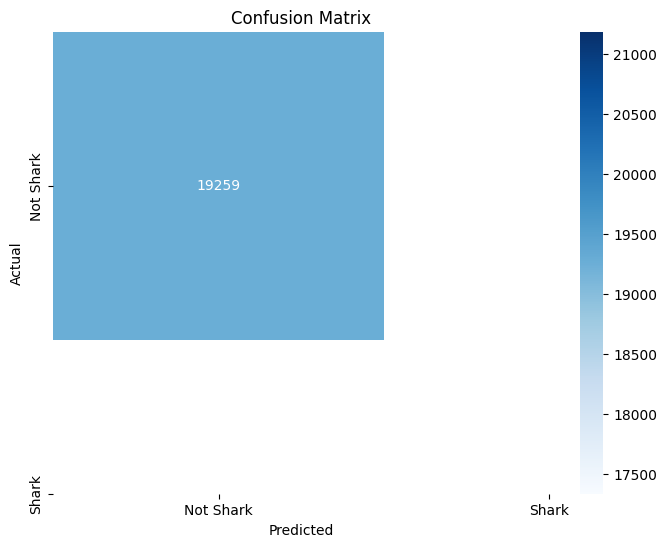

In [ ]:
df['CnvFactor'] = pd.to_numeric(df['CnvFactor'], errors='coerce')
df['Qty_t'] = pd.to_numeric(df['Qty_t'], errors='coerce')
df.dropna(subset=['Species', 'Qty_t', 'Area'], inplace=True)

X = df[['CnvFactor', 'Qty_t']]
y = df['Area']

species = 'BSH'
y = (df['CatchTypeCode'] == species).astype(int)


print("\nFeature Matrix (X):")
print(X.describe())
print("\nTarget Summary (y):")
print(y.value_counts())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)

y_pred = dtc.predict(X_test)

print("\nClassification Report")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Shark', 'Shark'], yticklabels=['Not Shark', 'Shark'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


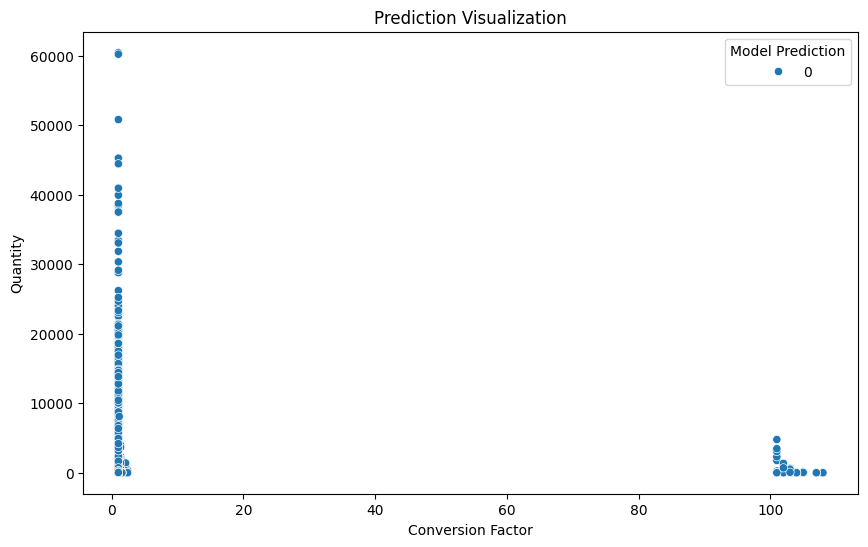


Misclassified Samples:
Empty DataFrame
Columns: [CnvFactor, Qty_t, Actual, Model Prediction]
Index: []


In [ ]:
X_test = X_test.copy()
X_test['Actual'] = y_test
X_test['Model Prediction'] = y_pred

plt.figure(figsize=(10, 6))
sns.scatterplot(data=X_test, x='CnvFactor', y='Qty_t', hue='Model Prediction')
plt.xlabel('Conversion Factor')
plt.ylabel('Quantity')
plt.title('Prediction Visualization')
plt.show()

misclassified = X_test[X_test['Actual'] != X_test['Model Prediction']]
print("\nMisclassified Samples:")
print(misclassified.head())

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_excel('shark.xlsx')

# Fill missing numeric values with median and categorical with mode
df.fillna(df.median(numeric_only=True), inplace=True)
df.fillna(df.mode().iloc[0], inplace=True)

# Create shark presence column
df['shark_presence'] = df['Species'].apply(lambda x: 1 if x == 'BSH' else 0)

# Convert necessary columns to numeric
df['CnvFactor'] = pd.to_numeric(df['CnvFactor'], errors='coerce')
df['Qty_t'] = pd.to_numeric(df['Qty_t'], errors='coerce')

# Drop rows with missing important data
df.dropna(subset=['Species', 'Qty_t', 'Area'], inplace=True)

# Filter for shark species "LL"
shark_df = df[df['Species'] == 'LL']

# Encode categorical 'Area'
le_area = LabelEncoder()
shark_df['Area_Encoded'] = le_area.fit_transform(shark_df['Area'])

# Features and target
X = shark_df[['CnvFactor', 'Qty_t']]
y = shark_df['Area_Encoded']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision tree with varying depths
for depth in range(1, 11):
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    clf.fit(X_train, y_train)
    test_pred = clf.predict(X_test)
    test_accuracy = np.mean(test_pred == y_test)
    print(f"Max Depth: {depth} | Test Accuracy: {test_accuracy:.2f}")

# Final model and predictions
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le_area.classes_)
disp.plot(cmap='viridis')

print("\nConfusion Matrix:")
print(cm)

# Sample predictions
print("\nSample Predictions:")
print(X_test.iloc[:5])
print(y_pred[:5])

# Summary of features and target
print("\nFeature Matrix (X):")
print(X.describe())
print("\nTarget Summary (y):")
print(shark_df['Area_Encoded'].value_counts())


ValueError: With n_samples=0, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

<ipython-input-21-2cd50072a207>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shark_df['Area_Encoded'] = le_area.fit_transform(shark_df['Area'])


Max Depth: 1 | Test Accuracy: 0.24
Max Depth: 2 | Test Accuracy: 0.28
Max Depth: 3 | Test Accuracy: 0.29
Max Depth: 4 | Test Accuracy: 0.29
Max Depth: 5 | Test Accuracy: 0.28
Max Depth: 6 | Test Accuracy: 0.28
Max Depth: 7 | Test Accuracy: 0.27
Max Depth: 8 | Test Accuracy: 0.25
Max Depth: 9 | Test Accuracy: 0.26
Max Depth: 10 | Test Accuracy: 0.26


ValueError: The number of FixedLocator locations (17), usually from a call to set_ticks, does not match the number of labels (19).

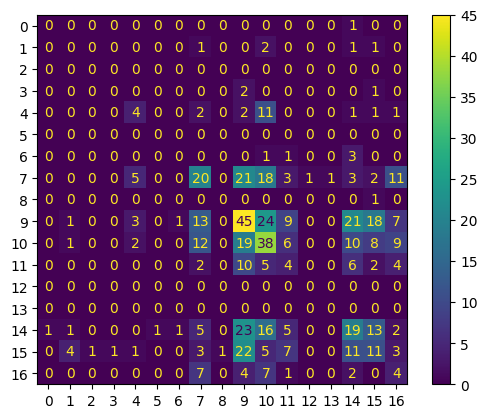

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_excel('shark.xlsx')

# Fill missing numeric values with median and categorical with mode
df.fillna(df.median(numeric_only=True), inplace=True)
df.fillna(df.mode().iloc[0], inplace=True)

# Create shark presence column
df['shark_presence'] = df['Species'].apply(lambda x: 1 if x == 'BSH' else 0)

# Convert necessary columns to numeric
df['CnvFactor'] = pd.to_numeric(df['CnvFactor'], errors='coerce')
df['Qty_t'] = pd.to_numeric(df['Qty_t'], errors='coerce')

# Drop rows with missing important data
df.dropna(subset=['Species', 'Qty_t', 'Area'], inplace=True)

# Filter for shark species - ***CHANGED THIS LINE***
# Instead of filtering for 'LL', which results in an empty DataFrame,
# consider filtering for a species that actually exists in your data.
# For example, if 'BSH' is a common species, you could use:
shark_df = df[df['Species'] == 'BSH']
# Or, if you want to include all shark species, remove the filtering:
# shark_df = df

# Encode categorical 'Area'
le_area = LabelEncoder()
shark_df['Area_Encoded'] = le_area.fit_transform(shark_df['Area'])

# Features and target
X = shark_df[['CnvFactor', 'Qty_t']]
y = shark_df['Area_Encoded']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision tree with varying depths
for depth in range(1, 11):
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    clf.fit(X_train, y_train)
    test_pred = clf.predict(X_test)
    test_accuracy = np.mean(test_pred == y_test)
    print(f"Max Depth: {depth} | Test Accuracy: {test_accuracy:.2f}")

# Final model and predictions
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le_area.classes_)
disp.plot(cmap='viridis')

print("\nConfusion Matrix:")
print(cm)

# Sample predictions
print("\nSample Predictions:")
print(X_test.iloc[:5])
print(y_pred[:5])

# Summary of features and target
print("\nFeature Matrix (X):")
print(X.describe())
print("\nTarget Summary (y):")
print(shark_df['Area_Encoded'].value_counts())